#1. Análisis Descriptivo en R
## 1.1 Explorando y entendiendo la información

Después de haber obtenido la información y haberla cargado en R, el siguiente paso consiste en examinar la información en detalle. Es durante este paso que empezaremos a explorar las características de los datos y donde podremos darnos cuenta de la naturaleza única de nuestra based de datos. Entre mejor se entienda la información, mejor será formular un modelo que describa y se ajuste bien a los datos.

Usamos una base de datos llamada

usedcars.csv

La cual contiene información acerca de autos usados junto con algunas características:

In [5]:
data = read.csv("/content/usedcars.csv")

In [7]:
head(data)

,year,model,price,mileage,color,transmission
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,2011,SEL,21992,7413,Yellow,AUTO
2,2011,SEL,20995,10926,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
5,2012,SE,17500,8367,White,AUTO
6,2010,SEL,17495,25125,Silver,AUTO


## 1.2 Explorando la estructura de la información

Una de las primeras preguntas que uno debería hacerse en la investigación debería ser acerca de cómo se organizan los datos. 

La función *str()* proporciona un método para mostrar la estructura de un data frame, o cualquier otra estructura de información de R incluyendo vectores y listas. Se puede crear un contenido básico para nuestro diccionario:

In [8]:
str(data)

'data.frame':	150 obs. of  6 variables:
 $ year        : int  2011 2011 2011 2011 2012 2010 2011 2010 2011 2010 ...
 $ model       : chr  "SEL" "SEL" "SEL" "SEL" ...
 $ price       : int  21992 20995 19995 17809 17500 17495 17000 16995 16995 16995 ...
 $ mileage     : int  7413 10926 7351 11613 8367 25125 27393 21026 32655 36116 ...
 $ color       : chr  "Yellow" "Gray" "Silver" "Gray" ...
 $ transmission: chr  "AUTO" "AUTO" "AUTO" "AUTO" ...


### Descripción de la variable "model"
SEL: especial edition luxury

SES: especial edition sport

SE: especial edition

## 1.3 Explorando variables numéricas

Para investigar en la base de datos de carros usados, empleamos un conjunto de medidas comunmente usado para describir los valores como un **resúmen estadístico**. La función


```
summary(variable)
```
muestra varios estadístios de resúmen.



In [11]:
summary(data$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3800   10995   13592   12962   14904   21992 

In [12]:
summary(data$mileage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4867   27200   36385   44261   55124  151479 

In [13]:
summary(data[c("price","mileage")])

     price          mileage      
 Min.   : 3800   Min.   :  4867  
 1st Qu.:10995   1st Qu.: 27200  
 Median :13592   Median : 36385  
 Mean   :12962   Mean   : 44261  
 3rd Qu.:14904   3rd Qu.: 55124  
 Max.   :21992   Max.   :151479  

###1.3.1 Midiendo la tendencia central: la Media y Mediana
En estadística el promedio es conocido como la **media**, una medida conocida como la suma de todos los valores divididos por la cantidad de ellos. Ya sabíamos como obtener la media usando la función 

```
mean(vector numérico)
```
Este estadístico básicamente nos da una medida que indica el valor que se podría suponer que tiene cada observación en caso de distribuirse equitativamente.

Aunque la media es un estadístico más utilizado para medir el centro de un conjunto de datos, no es siempre se usa. Otra medida de tendencia central comunmente usada es la **mediana**, cuyo valor está ubicada exactamente en la mitad del conjunto de datos numéricos en un vector. Como la media, R también nos ofrece un comando para poder obtener la mediana de un conjunto de datos:

```
median(vector numérico)
```

In [20]:
median(data$price)

[1] 13591.5

In [21]:
mean(data$price)

[1] 12961.93

###1.3.2 Medición de la dispersión: cuartiles y resumen de cinco números

Mientras las medidas de tendencia central nos sirven para obtener un resumen de la información numérica en un vector, existen otras conocidas como medidas de **dispersión**, las cuales nos ayudan a saber cuan alejados se encuentran los datos entre sí. Conocer la propagación proporciona
un sentido de los valores extremos de los datos, y si la mayoría de los valores son similares o diferentes a los
media y mediana.

Los cinco números que resultan de aplicar la función *summary()*, escritos en orden son:

* Mínimum(*min()*)
* First quartile, o Q1(1st. Qu.)
* Median, o Q2(*Median()*)
* Third quartile, o Q3(3rd Qu.)
* Maximum(*max()*)
El comando


```
range(vector numérico)
```
proporciona un los valores mínimo y máximo de un vector numérico en ese orden. La función 

```
diff(vector numérico)
```
nos ayuda a encontrar la diferencia de entre los elementos de un vector.

Combinando estas funciones, podríamos ver cuál es el rango de valores sobres los cuales estamos trabajando y además, cuanto mide ese intervalo.




In [22]:
range(data$mileage)

[1]   4867 151479

In [23]:
diff(range(data$mileage))

[1] 146612

* El primer y tercer cuartiles, Q1 y Q3, se refieren al valor por debajo o por encima del cual
se encuentra una cuarta parte de los valores. 
* Junto con la mediana (Q2), los cuartiles se dividen
 un conjunto de datos en cuatro porciones, cada una con el mismo número de  valores.
* La diferencia entre Q3 y Q1 se le conoce como **rango intercuartílico** y se calcula con la función 

```
IQR(vector numérico)
```

In [28]:
IQR(data$mileage)

[1] 27924.25

La función 

```
quantile(vector numérico)
```
proporciona una herramienta para identificar cuantiles de un conjunto de valores.


In [30]:
print(quantile(data$price,probs = 0.5))

    50% 
13591.5 


## **Ejercicio**

Use un comando para conocer los cuantiles en 0%, 20%, 40%, ...,100% de la variable "mileage".

In [43]:
print(quantile(data$mileage,probs=seq(from=0,to=1,by=0.2)))

      0%      20%      40%      60%      80%     100% 
  4867.0  24017.4  34708.8  40106.8  63951.8 151479.0 


##1.3.4 Visualización de variables numéricas - diagramas de cajas y bigotes

La visualización de las variables numéricas puede ser útil para el diagnóstico de muchos problemas con la información. Los **diagramas de cajas y bigotes** muestran el centro y la dispersión de una variable numérica en un formato que le permite a uno rápidamente tener noción acerca del rango de valores y el sesgo de la variable, o compararlo con otras variables.

Para hacer los gráficos de dichos diagramas, usamos la función


```
boxplot()
```
Como ejemplo, echaremos un vistazo a un digrama de cajas y bigotes para las variables "price" y "mileage".



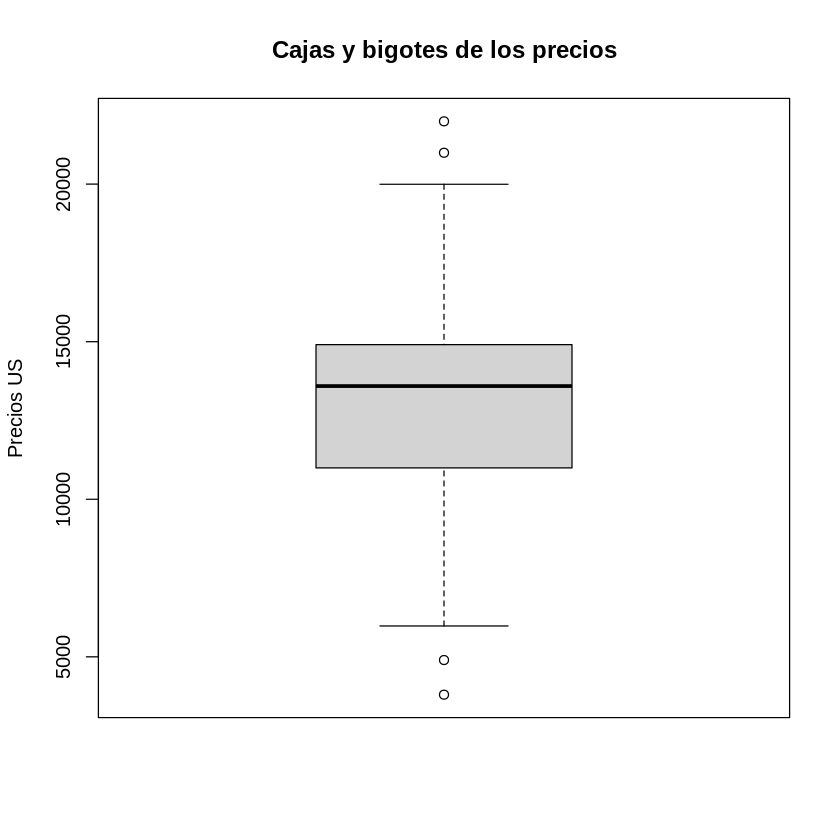

In [44]:
boxplot(data$price,main="Cajas y bigotes de los precios",ylab="Precios US")

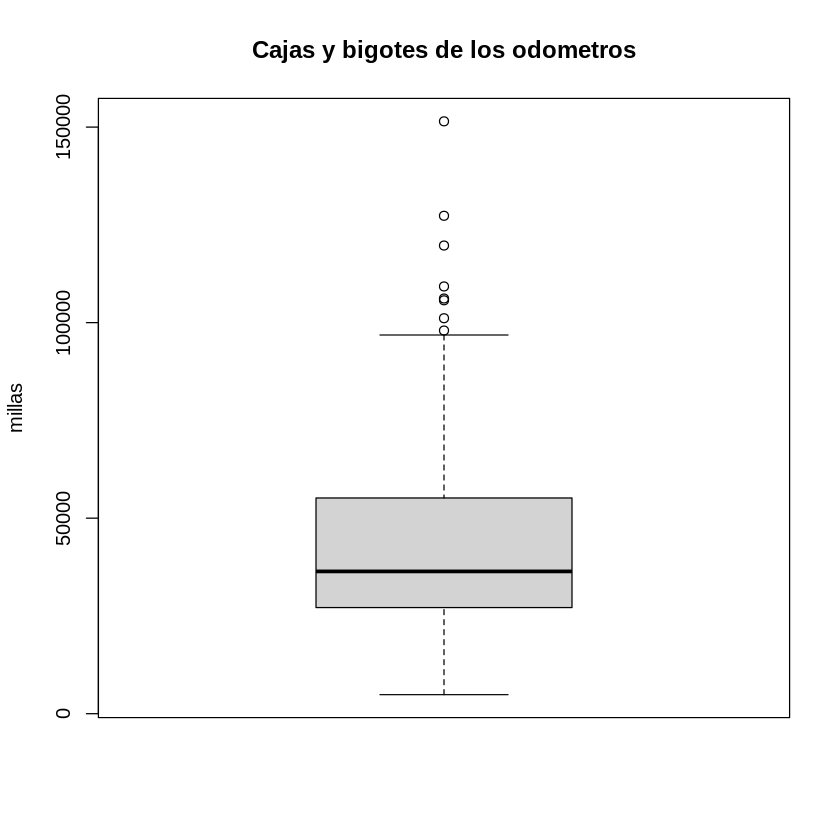

In [45]:
boxplot(data$mileage,main="Cajas y bigotes de los odometros",ylab="millas")

In [46]:
library(ggplot2)

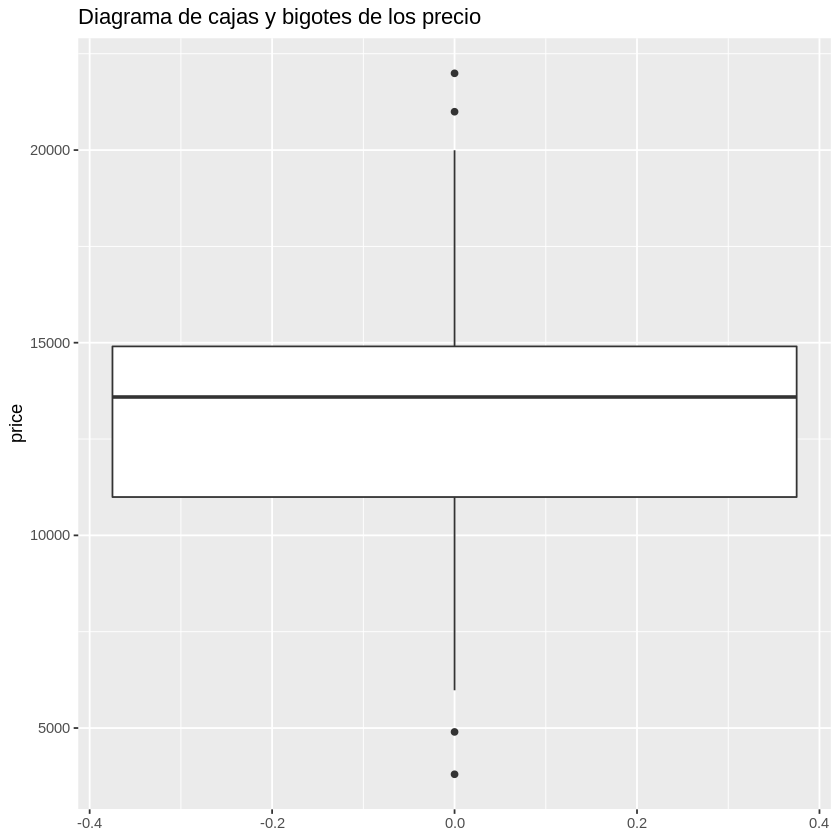

In [47]:
ggplot(data,aes(y=price))+geom_boxplot()+ggtitle("Diagrama de cajas y bigotes de los precio")

### 1.3.5 Visualizando variables numéricas - histogramas

Un **histograma** es otra forma de representación gráfica de los datos numéricos. Es similar a un diagrama de cajas y bigotes en el sentido que divide los valores de la variable en un número predeterminado de porciones, **bins** que actuan como contenedores de los valores. Un histograma usa cualquier número de contenedores de identico tamaño, y permite por tanto, que cada contenedor tenga cualquier número de datos.

Usamos el comando 


```
hist()
```
  

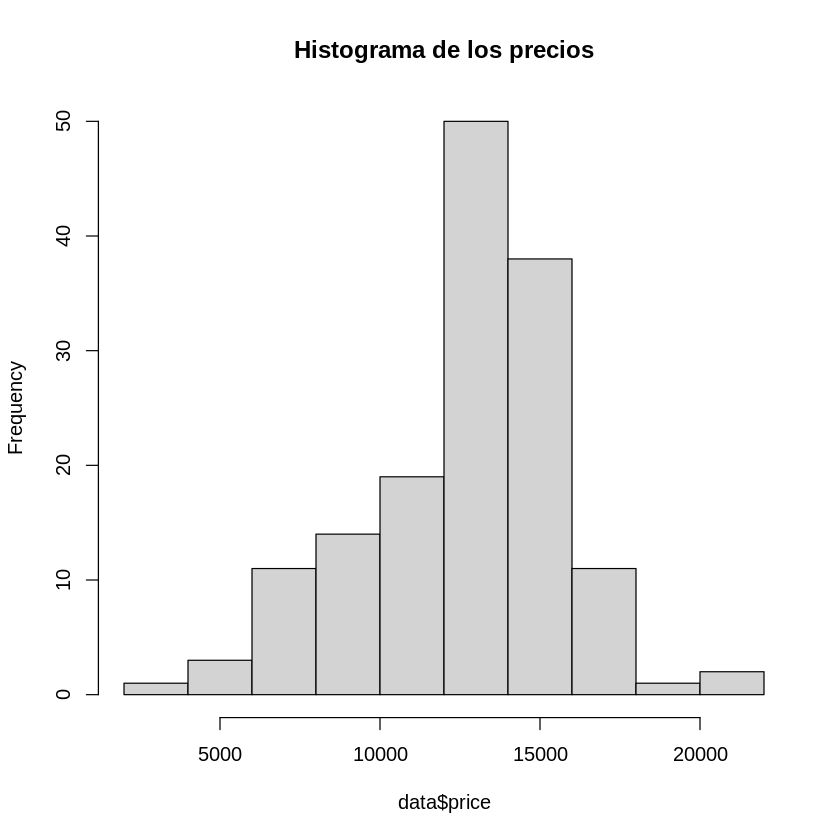

In [50]:
hist(data$price,main="Histograma de los precios") 

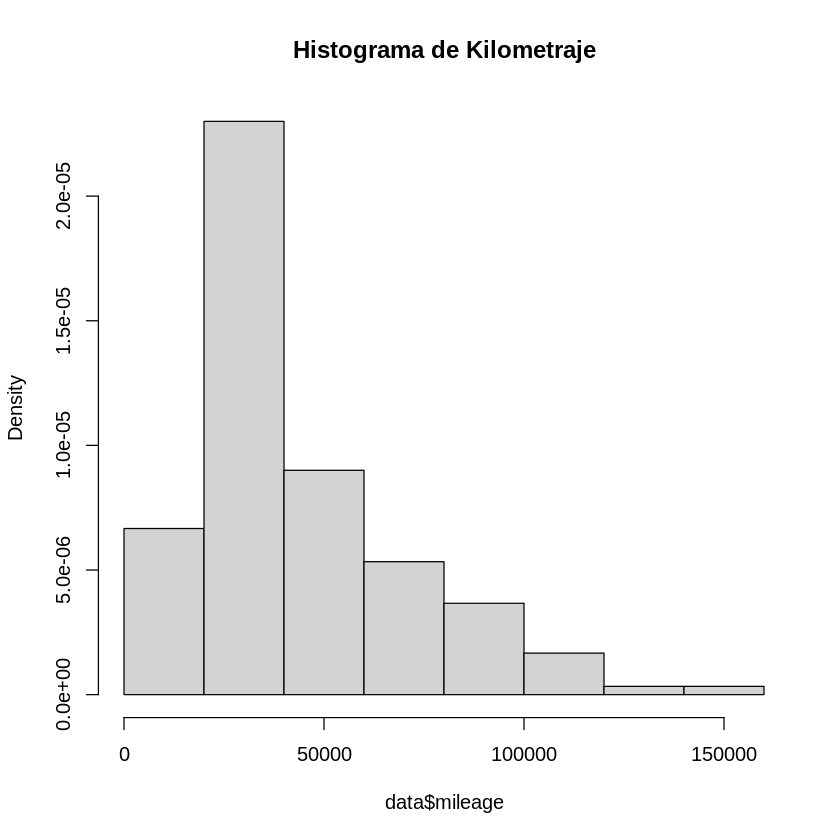

In [53]:
hist(data$mileage,main="Histograma de Kilometraje",probability = TRUE)

## **Ejercicio**. 
Busca la función 


```
density()
```
y dibuja la distribución de probabilidad de la variable de precios "price" sobre el gráfico del histograma normalizado.


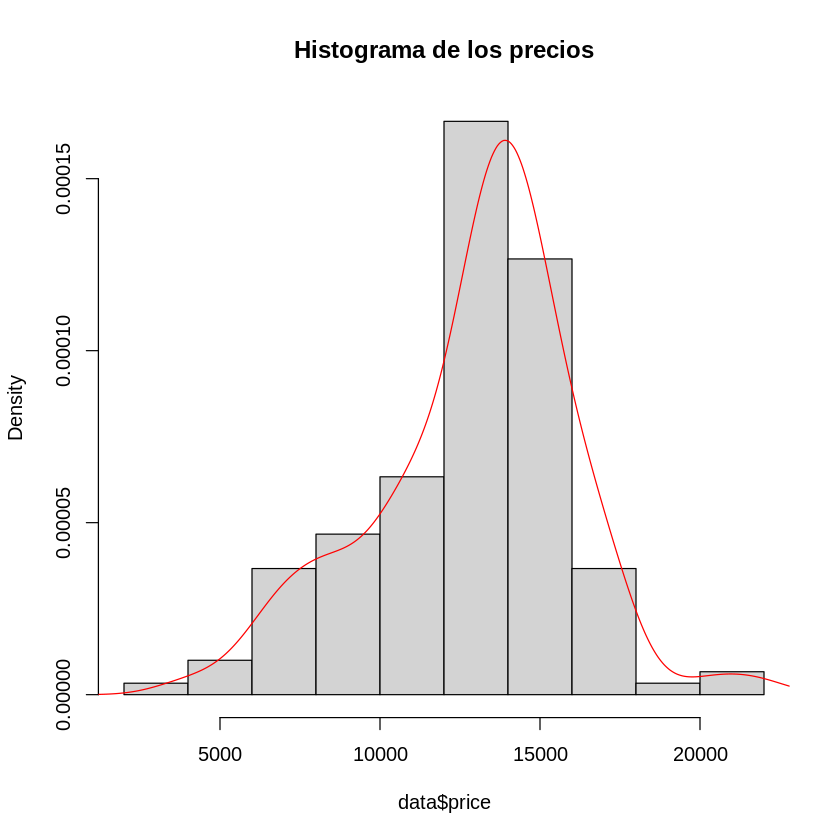

In [54]:
hist(data$price,main="Histograma de los precios",probability = T)
lines(density(data$price),col="red") 

### 1.3.6 Distribuciones uniforme y normal

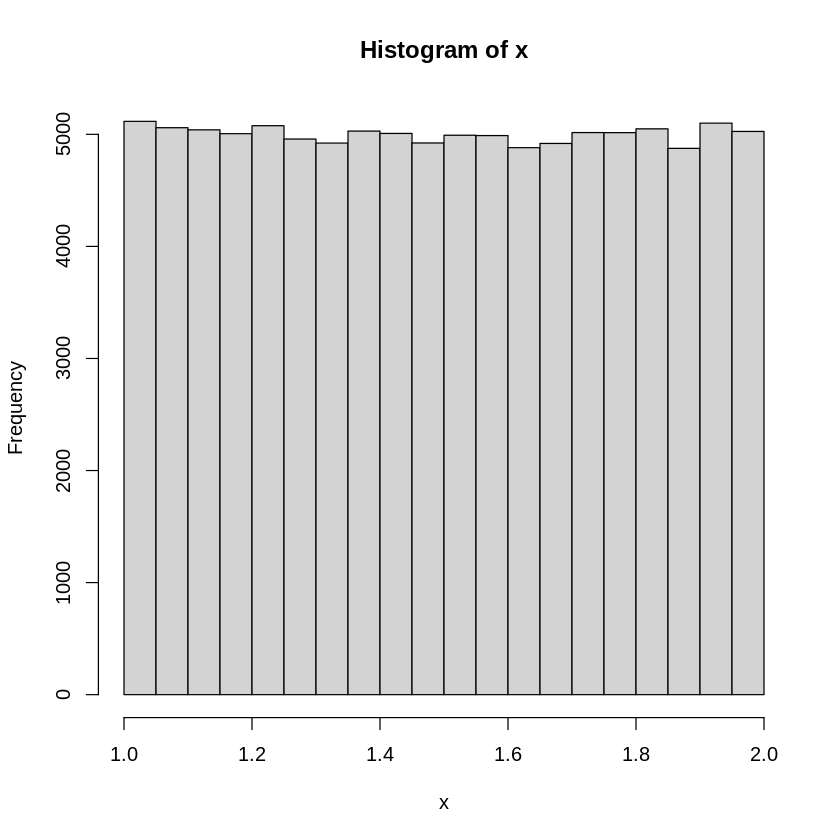

In [62]:
x = runif(100000,1,2)
hist(x)

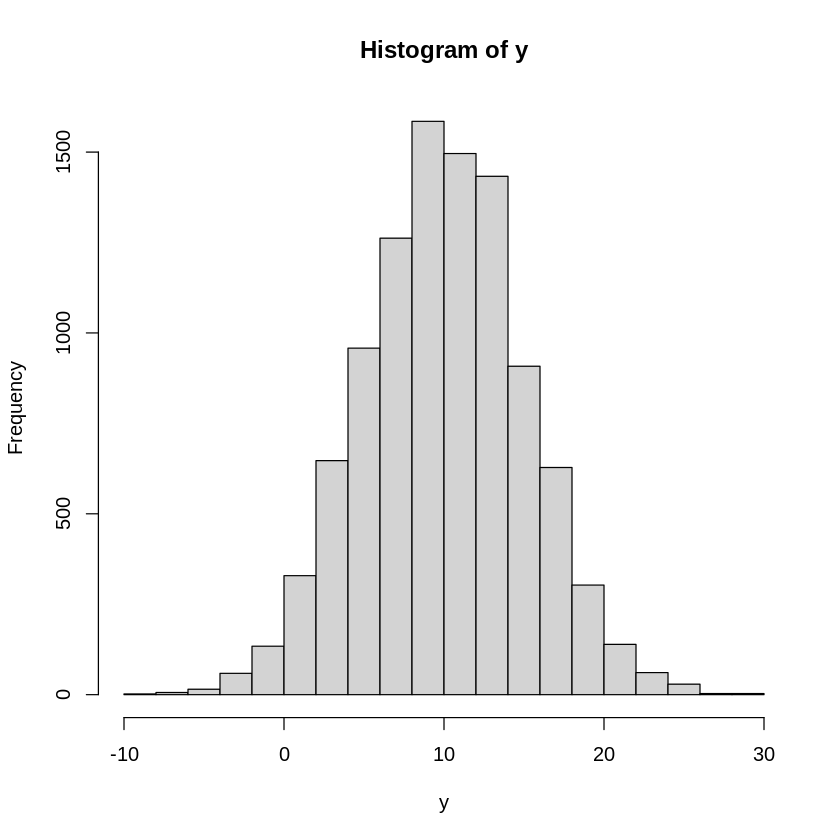

In [67]:
y = rnorm(10000,mean=10,sd=5)
hist(y)

### 1.3.7 Medida de dispersión de datos numéricos - varianza y desviación estándar
Recordemos la varianza muestral de un vector numérico $\vec{x}=(x_1,x_2,...,x_n)$ la calculamos con la fórmula
$$\text{Var}(\vec{x})=\sigma^2=\frac{1}{n-1}\sum_{k=1}^n(x_i-\mu)^2$$
y la **desviación estándar** es dada por 
$$\text{SD}(\vec{x})=\sigma=\sqrt{\frac{1}{n-1}\sum_{k=1}^n(x_i-\mu)^2}$$

In [68]:
var(data$price)

[1] 9749892

In [69]:
sd(data$price)

[1] 3122.482

##1.4 Exploración de variables categóricas

En el data frame carros usados, tenemos tres variables que se pueden considerar como categóricas: *model*, *color* y *transmission*. Adicionalmente podemos considerar la variable *year* como variable categórica, aunque su clasificación es de entero *int*, cada valor del año es una categoría que se puede aplicar a los carros.

De manera distinta a la función *summary()*, usamos la función


```
table()
```
para examinar las variables categóricas.



In [70]:
names(data)

[1] "year"         "model"        "price"        "mileage"      "color"       
[6] "transmission"

In [71]:
table(data$model)


 SE SEL SES 
 78  23  49 

In [72]:
table(data$year)


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   3    1    1    1    3    2    6   11   14   42   49   16    1 

La salida de la tabla enumera las categorías de la variable nominal y un recuento de la número de valores que entran en esa categoría. Como sabemos que hay 150 usados automóviles en el conjunto de datos, podemos determinar que aproximadamente un tercio de todos los automóviles fueron fabricado en 2010, ya que 49/150 es aproximadamente el 33 por ciento.

Para poder establecer las proporciones en cada categoría, podemos aplicar la función


```
prop.table()
```
a la tabla de las categorías.

In [75]:
print(prop.table(table(data$year)))


       2000        2001        2002        2003        2004        2005 
0.020000000 0.006666667 0.006666667 0.006666667 0.020000000 0.013333333 
       2006        2007        2008        2009        2010        2011 
0.040000000 0.073333333 0.093333333 0.280000000 0.326666667 0.106666667 
       2012 
0.006666667 


### **Ejercicio**
Muestra los resultados en porcentajes con una posición decimal para la variable "color".

In [77]:
round(prop.table(table(data$color)),1)


 Black   Blue   Gold   Gray  Green    Red Silver  White Yellow 
   0.2    0.1    0.0    0.1    0.0    0.2    0.2    0.1    0.0 

## Visualización de datos categóricos: Tortas estadísticas

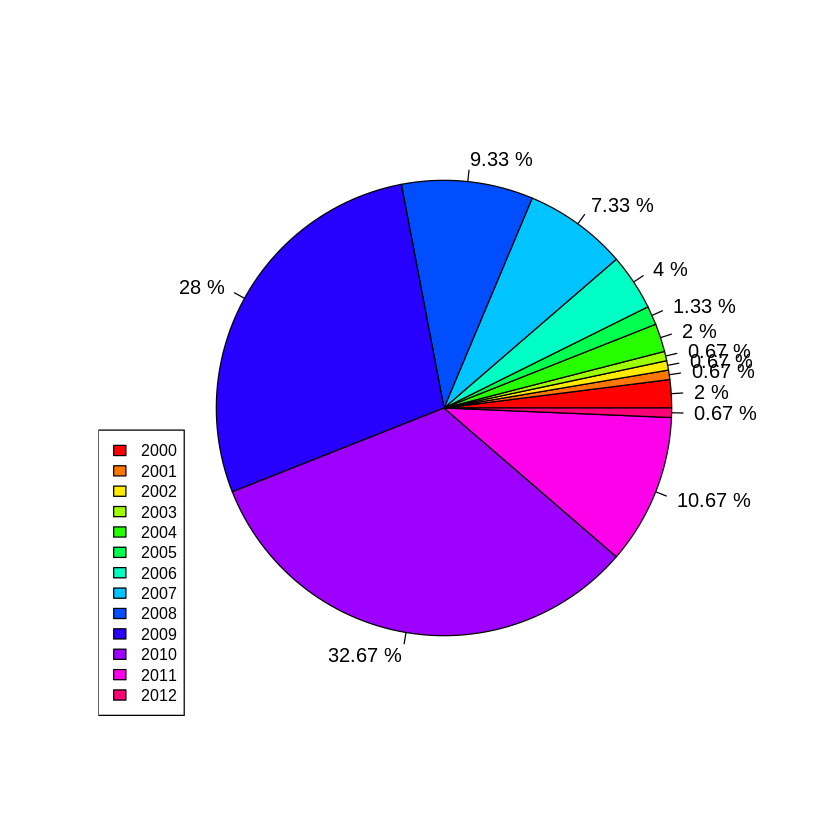

In [79]:
piepercent = round(100*table(data$year)/150,2)
tick = as.character(2000:2012)
pie(table(data$year),labels=paste(as.character(piepercent),"%"),col=rainbow(length(tick)))
legend("bottomleft",legend=tick,cex=0.8,fill=rainbow(length(tick)))

## 1.4.1 Midiendo la tendencia central - La moda

La moda es el elemento en un conjunto de variables categóricas o numéricas, que más se repite. A diferencia de las funciones conocidas *mean()* y *median()*, R no tiene una función incorporada para calcular la moda, para eso podríamos idear una función.

In [80]:
getmode = function(v){ # vectores unimodales.
  unicos_de_v = unique(v)
  unicos_de_v[which.max(tabulate(match(v,unicos_de_v)))]
}

In [81]:
getmode(data$year)

[1] 2010

In [82]:
getmode(data$color)

[1] "Black"

In [83]:
getmode(c("A","B","A","B","C"))

[1] "A"

También se puede usar el paquete *modeest*

In [84]:
install.packages("modeest")
library(modeest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’




In [86]:
mlv(data$year,method = "mfv") # Sirve para vectores con más de una moda

[1] 2010

In [87]:
mlv(c("A","B","A","B","C"),method = "mfv")

[1] "A" "B"

## 1.5 Explorando la relación entre variables 
Se refiere a las preguntas que uno podría hacerse durante la investigación que se realiza en la cual se quiere ver si hay relación entre variables.

* ¿La información del precio implica que estamos examinando carros baratos, o hay carros lujosos con alto recorrido?
* ¿La relación entre el modelo y el color proporcionan una conclusión en los tipos del carro que estamos examinando?

### Diagrama de dispersión para ver la relación entre kilometraje y precio

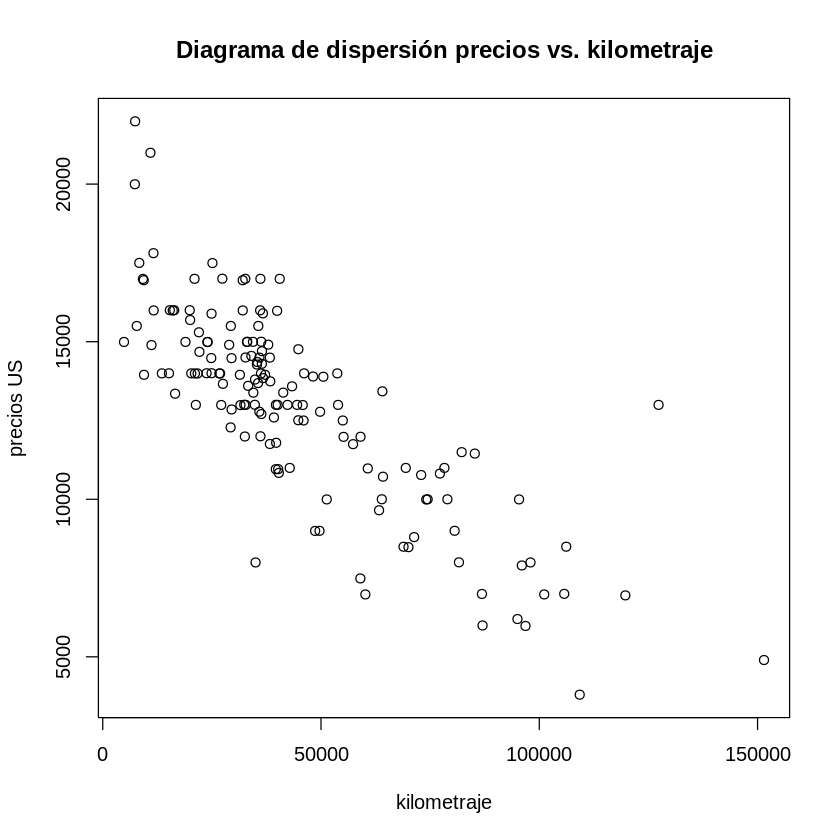

In [88]:
plot(x = data$mileage, y = data$price, main="Diagrama de dispersión precios vs. kilometraje",xlab="kilometraje",ylab="precios US")

# Ejercicio

Cargue el conjunto de datos de usedcars. ¿Cuáles son los tres colores de automóviles más frecuentes que se encuentran en el conjunto de datos? Produzca un diagrama de dispersión de precio versus kilometraje en el que indique los autos negros con puntos negros, los autos rojos con puntos rojos y los autos plateados con puntos azules.